**Connecting the Word "not" with Adjective Words in Amazon Food Review**
In this project, data from Kaggle, consisting of food reviews spanning a period of 10 years, is used and accessed via the provided link (https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews). The word "not" is connected with any adjective words, such as "not great," "not good," and similar phrases. Word clouds are then created for reviews of products with 5-star and 1-star ratings.

Stores are then classified as either "Bad Store" or "Good Store" based on the sentiment of the review text and the review scores provided by customers. Once the classification is completed, products that are not selling well in good stores are identified. Recommendations regarding possible marketing strategies, such as implementing flash sales for these products, are then made to Amazon. Additionally, the best-selling products in bad stores are identified using word clouds, with the most frequently appearing words, or those displayed more prominently, suggested to bad stores as areas for improvement.

Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Clean data

In [ ]:
import pandas as pd

# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Reviews_withURL.csv'  # Update with your actual file path

# Read the .csv file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can use the DataFrame 'df' to work with the data from the .csv file

Clean data in "Text" column

In [ ]:
#Delete Unnamed: and ProductURL column
# Drop the "Unnamed:" column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Get the number of rows in the original DataFrame
original_rows = df.shape[0]

# Drop duplicate rows based on the "Text" column and keep the first occurrence
df.drop_duplicates(subset='Text', keep='first', inplace=True)

# Get the number of rows in the deduplicated DataFrame
deduplicated_rows = df.shape[0]

# Print the number of rows in the original and deduplicated DataFrames
print("Number of rows in the original DataFrame: ", original_rows)
print("Number of rows in the deduplicated DataFrame: ", deduplicated_rows)

Number of rows in the original DataFrame:  568454
Number of rows in the deduplicated DataFrame:  393579


In [ ]:
df.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

                             ProductURL  
0  https://www.amazon.com/dp/B001E4KFG0  
1  https://www.amazon.com/dp/B00813GRG4  
2  https://www.amazon.com/dp/B000LQOCH0

Clean data in "Text" column

In [ ]:
#set of stopwords
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')


#function to clean the word of any html-tags
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

#function to clean the word of any punctuation or special characters
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):

    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]

    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            s=(sno.stem(word.lower()))
            return s
        else:
            pass

    text = [test(x) for x in text if test(x)]

    return ' '.join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.shape

from tqdm import tqdm
tqdm.pandas()

df['CleanedText'] = df['Text'].progress_apply(final_sentence)
print(df.shape)
df.head()



100%|██████████| 393579/393579 [09:02<00:00, 725.05it/s]


(393579, 12)


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great wide assort yummi deliveri t...

In [ ]:
import pandas as pd

# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Tokenized.csv'  # Update with your actual file path

# Read the .csv file into a DataFrame
df1 = pd.read_csv(csv_file_path)

# Now you can use the DataFrame 'df' to work with the data from the .csv file

In [ ]:
df1.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   

                                         CleanedText  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...

Average Score by Year

Time  Score
1999  5            4
2000  1            1
      4            1
      5           15
2001  1            1
               ...  
2012  1        14463
      2         7933
      3        10970
      4        19911
      5        85808
Name: Score, Length: 62, dtype: int64


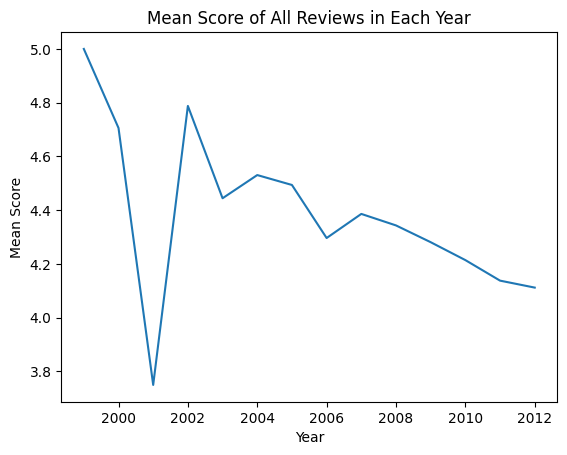

In [ ]:
 import matplotlib.pyplot as plt
 import pandas as pd

df1['Time'] = pd.to_datetime(df1['Time'], unit='s').dt.year

score_counts = df1.groupby(['Time', 'Score'])['Score'].count()
print(score_counts)

mean_score = df1.groupby('Time')['Score'].mean()

plt.plot(mean_score.index, mean_score.values)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Mean Score of All Reviews in Each Year')
plt.show()

Time
1999         4
2000        17
2001         8
2002        33
2003        99
2004       439
2005      1059
2006      4722
2007     15752
2008     23100
2009     37866
2010     57967
2011    113428
2012    139085
Name: UserId, dtype: int64


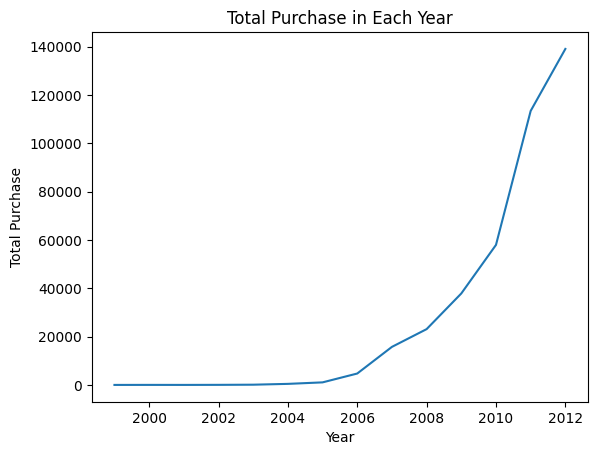

In [ ]:
total_purchase_counts = df1.groupby('Time')['UserId'].count()
print(total_purchase_counts)

plt.plot(total_purchase_counts.index, total_purchase_counts.values)
plt.xlabel('Year')
plt.ylabel('Total Purchase')
plt.title('Total Purchase in Each Year')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


# Define the lambda function to map the scores to sentiment
def map_sentiment(score, text, helpfulness_numerator, helpfulness_denominator):
    if score > 3 and helpfulness_numerator > 0 and helpfulness_denominator == helpfulness_numerator:
        return 'positive'
    elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator != helpfulness_numerator:
        return 'negative'
    elif score > 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator:
        return 'positive'
    elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator:
        return 'negative'
    elif score == 3:
        sentiment_scores = sia.polarity_scores(text)
        if helpfulness_numerator > 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] >= 0.7:
            return 'positive'
        elif helpfulness_numerator == 0 and helpfulness_denominator != helpfulness_numerator and sentiment_scores['compound'] < 0.7:
            return 'negative'
        elif helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] >= 0.7:
            return 'positive'
        elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] < 0.7:
            return 'negative'
        else:
            return 'positive' # default to positive sentiment for score of 3 if none of the above conditions are met
    else:
        return 'negative' # default to neutral sentiment for scores less than 3


In [ ]:
# Apply the map_sentiment function to the Score, CleanedText, HelpfulnessNumerator, and HelpfulnessDenominator columns and store the result in a new column called 'Sentiment'
sentiments = []
for score, text, helpfulness_numerator, helpfulness_denominator in tqdm(zip(df1['Score'], df1['Text'], df1['HelpfulnessNumerator'], df1['HelpfulnessDenominator'])):
    sentiment = map_sentiment(score, text, helpfulness_numerator, helpfulness_denominator)
    sentiments.append(sentiment)


df1['Sentiment'] = sentiments
df1.head()


393579it [00:34, 11478.42it/s]


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score  Time  \
0                     1                       1      5  2011   
1                     0                       0      1  2012   
2                     1                       1      4  2008   
3                     3                       3      2  2011   
4                     0                       0      5  2012   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText Sentiment  
0  bought sever vital can dog food product found ...  positive  
1  product arriv label jumbo salt peanut actual s...  negative  
2  confect around pillowi citrus gelatin nut case...  positive  
3  look secret ingredi robitussin believ found go...  negative  
4  great taffi great wide assort yummi deliveri t...  positive

In [ ]:
# Create new columns 'GoodStore' and 'BadStore'
df1['GoodStore'] = df1['Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df1['BadStore'] = df1['Sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
df1.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score  Time  \
0                     1                       1      5  2011   
1                     0                       0      1  2012   
2                     1                       1      4  2008   
3                     3                       3      2  2011   
4                     0                       0      5  2012   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText Sentiment  GoodStore  \
0  bought sever vital can dog food product found ...  positive          1   
1  product arriv label jumbo salt peanut actual s...  negative          0   
2  confect around pillowi citrus gelatin nut case...  positive          1   
3  look secret ingredi robitussin believ found go...  negative          0   
4  great taffi great wide assort yummi deliveri t...  positive          1   

   BadStore  
0         0  
1         1  
2         0  
3         1  
4         0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Sentiment.csv'  # Update with your actual file path
import pandas as pd
# Read the .csv file into a DataFrame
df2 = pd.read_csv(csv_file_path)

Mounted at /content/drive


IMPORT DATASET FROM MONGODB

In [ ]:
score_sentiment_df2 = df2[['ProductId', 'Score','HelpfulnessNumerator','HelpfulnessDenominator','Sentiment']]
score_sentiment_df2.head()

ProductId  Score  HelpfulnessNumerator  HelpfulnessDenominator Sentiment
0  B001E4KFG0      5                     1                       1  positive
1  B00813GRG4      1                     0                       0  negative
2  B000LQOCH0      4                     1                       1  positive
3  B000UA0QIQ      2                     3                       3  negative
4  B006K2ZZ7K      5                     0                       0  positive

In [ ]:
# create a dictionary to store the sentiment counts for each product
sentiment_dict = {}
for product in score_sentiment_df2['ProductId'].unique():
    sentiment_dict[product] = {
        'negative': 0,
        'positive': 0
    }

# iterate over each row in the score_sentiment_df and increment the corresponding sentiment count
for index, row in score_sentiment_df2.iterrows():
    sentiment_dict[row['ProductId']][row['Sentiment']] += 1

# create a new dataframe from the sentiment_dict
sentiment_counts_df2 = pd.DataFrame.from_dict(sentiment_dict, orient='index')

# add the ProductId column
sentiment_counts_df2.index.name = 'ProductId'

# display the first 10 rows
sentiment_counts_df2.head(10)

negative  positive
ProductId                     
B001E4KFG0         0         1
B00813GRG4         1         0
B000LQOCH0         0         1
B000UA0QIQ         1         0
B006K2ZZ7K         0         4
B000E7L2R4         0         1
B00171APVA         0         1
B0001PB9FE         0         1
B0009XLVG0         1         1
B001GVISJM         5        10

In [ ]:
sentiment_counts_df2 = sentiment_counts_df2.sort_values(['positive', 'negative'], ascending=[False, True])
sentiment_counts_df2

negative  positive
ProductId                     
B007JFMH8M        18       891
B002QWP89S        57       573
B003B3OOPA        97       525
B000NMJWZO        26       516
B001EO5Q64        78       487
...              ...       ...
B000KS3L4E        13         0
B0032GREWQ        16         0
B000G1EO0A        20         0
B000FIDLNU        24         0
B000NY8OLK        37         0

[67554 rows x 2 columns]

In [ ]:
good_store = sentiment_counts_df2[sentiment_counts_df2['positive']>sentiment_counts_df2['negative']]
good_store.sort_values(['positive'], ascending=False)
print(good_store.head(5))
print(good_store.tail(5))

            negative  positive
ProductId                     
B007JFMH8M        18       891
B002QWP89S        57       573
B003B3OOPA        97       525
B000NMJWZO        26       516
B001EO5Q64        78       487
            negative  positive
ProductId                     
B005ZC0RRO         0         1
B000NY8O9M         0         1
B006T7TKZO         0         1
B000H7K114         0         1
B001LR2CU2         0         1


In [ ]:
bad_store = sentiment_counts_df2[sentiment_counts_df2['negative']>sentiment_counts_df2['positive']]
bad_store.sort_values(['negative'], ascending=False)
print(bad_store.head())
print(bad_store.tail())

            negative  positive
ProductId                     
B007I7Z3Z0       232       128
B0045XE32E       165       117
B007RTR9DS        94        92
B004Q3LBTG       103        87
B000FI4O90       103        87
            negative  positive
ProductId                     
B000KS3L4E        13         0
B0032GREWQ        16         0
B000G1EO0A        20         0
B000FIDLNU        24         0
B000NY8OLK        37         0


Product Rank Based on Total Purchase

In [ ]:
import warnings
warnings.filterwarnings("ignore")

good_store['Total Purchase'] = good_store['positive'] + good_store['negative']
good_store.head(10)

negative  positive  Total Purchase
ProductId                                     
B007JFMH8M        18       891             909
B002QWP89S        57       573             630
B003B3OOPA        97       525             622
B000NMJWZO        26       516             542
B001EO5Q64        78       487             565
B0013NUGDE        92       465             557
B000UBD88A        79       463             542
B000PDY3P0        79       407             486
B007TJGY46        65       391             456
B002LANN56        85       379             464

PIE CHART FOR GOOD STORE AND BAD STORE

| Store Type        |   Total Count |
|-------------------+---------------|
| Total Stores      |         62945 |
| Total Good Stores |         52609 |
| Total Bad Stores  |         10336 |


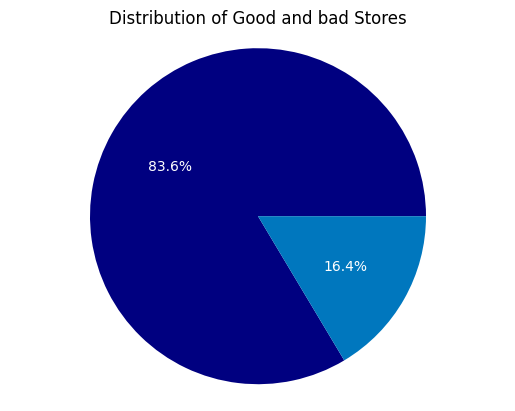

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calculate the total number of good and bad stores
total_good_stores = len(good_store)
total_bad_stores = len(bad_store)
total_stores = total_good_stores + total_bad_stores
# Create the table
table = [['Total Stores', total_stores], ['Total Good Stores', total_good_stores], ['Total Bad Stores', total_bad_stores]]
# Print the table
print(tabulate(table, headers=['Store Type', 'Total Count'], tablefmt='orgtbl'))


# Create a pie chart
sizes = [total_good_stores, total_bad_stores]
colors = ['#000080', '#0077be']
plt.pie(sizes, colors=colors, autopct='%1.1f%%', textprops={'color': 'white'})
plt.axis('equal')
plt.title('Distribution of Good and bad Stores')
plt.show()


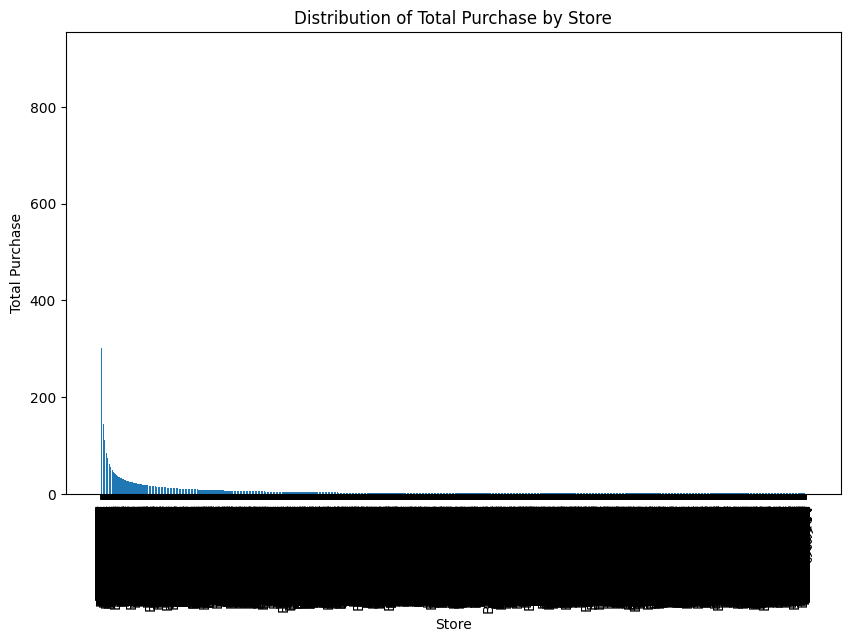

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'good_store' is your DataFrame
# Sort the DataFrame by 'Total Purchase' in descending order
good_store = good_store.sort_values('Total Purchase', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6)) # Set the figure size
plt.bar(good_store.index, good_store['Total Purchase']) # Set the x-axis and y-axis values
plt.xlabel('Store') # Set the x-axis label
plt.ylabel('Total Purchase') # Set the y-axis label
plt.title('Distribution of Total Purchase by Store') # Set the title of the chart
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show() # Show the bar chart


GOOD STORE WITH LOWEST PURCHASE

In [ ]:
good_store_sorted = good_store.sort_values(by='Total Purchase', ascending=True)
good_store_sorted.head()

negative  positive  Total Purchase
ProductId                                     
B001LR2CU2         0         1               1
B0035MNTNK         0         1               1
B000KOUOHU         0         1               1
B000H7K114         0         1               1
B006T7TKZO         0         1               1

In [ ]:
# Define the categories and corresponding keywords
categories = {
    'Health & Beauty': 'medicine|diet|fitness|lips|fragrance',
    'Food & Beverage': 'tasti|tea|instant|cookie|coffee',
    'Electronics': 'cellphones|smart|digital|tech|portable',
    'Pet Food': 'dog|cat|kitten|animal|rabbit',
    'Kitchen': 'kitchen|dining|blender|colander|tablecloth'
}

# Iterate over the categories and keywords to process the data and create dataframes
for category, keywords in categories.items():
    # Filter the data for the category
    df_category = df2[df2['Text'].str.contains(keywords, case=False)]

    # Show the number of rows
    print(f"Number of rows for {category}: {df_category.shape[0]}")

    # Create a dictionary to store the sentiment counts for each product
    sentiment_dict = {}
    for product in df_category['ProductId'].unique():
        sentiment_dict[product] = {
            'negative': 0,
            'positive': 0
        }

    # Iterate over each row in the data and increment the corresponding sentiment count
    for index, row in df_category.iterrows():
        sentiment_dict[row['ProductId']][row['Sentiment']] += 1

    # Create a new dataframe from the sentiment_dict
    df_category = pd.DataFrame.from_dict(sentiment_dict, orient='index')

    # Add the ProductId column
    df_category.index.name = 'ProductId'

    # Add a new column for the total number of purchases
    df_category['Total Purchase'] = df_category['negative'] + df_category['positive']

    # Sort the data by the lowest score in the positive column
    df_category = df_category[df_category['positive'] > df_category['negative']].sort_values(by='positive').head()

    # Display the data
    print(df_category)


Number of rows for Health & Beauty: 16161
            negative  positive  Total Purchase
ProductId                                     
B005DUM9UQ         0         1               1
B002AMZ1EG         0         1               1
B004N5DHDU         0         1               1
B00513J4T4         0         1               1
B00028LVKS         0         1               1
Number of rows for Food & Beverage: 119466
            negative  positive  Total Purchase
ProductId                                     
B00144C10S         0         1               1
B00099XK6I         0         1               1
B003JU9BBW         0         1               1
B002ATCFX4         0         1               1
B002SJUNU8         0         1               1
Number of rows for Electronics: 3187
            negative  positive  Total Purchase
ProductId                                     
B0037LW78C         0         1               1
B000X1GFN2         0         1               1
B000LJQAIG         0         1  

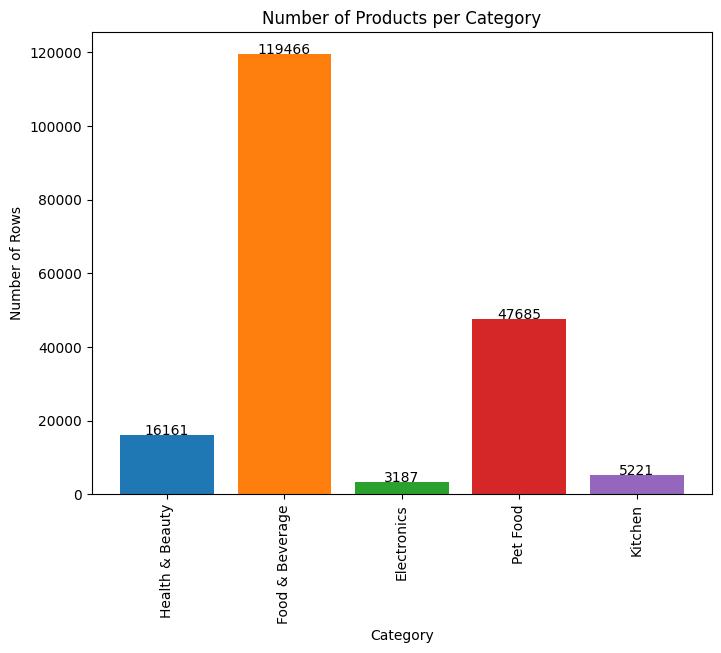

In [ ]:


# Define the categories and corresponding keywords
categories = {
    'Health & Beauty': 'medicine|diet|fitness|lips|fragrance',
    'Food & Beverage': 'tasti|tea|instant|cookie|coffee',
    'Electronics': 'cellphones|smart|digital|tech|portable',
    'Pet Food': 'dog|cat|kitten|animal|rabbit',
    'Kitchen': 'kitchen|dining|blender|colander|tablecloth'
}

# Create lists to store the number of rows and category names
num_rows = []
cat_names = []

# Create a figure object and set its size
fig = plt.figure(figsize=(8, 6))

# Iterate over the categories and keywords to process the data and create dataframes
for category, keywords in categories.items():
    # Filter the data for the category
    df_category = df2[df2['Text'].str.contains(keywords, case=False)]

    # Get the number of rows
    num = df_category.shape[0]

    # Add the number of rows and category name to the lists
    num_rows.append(num)
    cat_names.append(category)

    # Create a bar for the category with the number of rows as the label
    plt.bar(category, num, label=num)

# Set the chart title and axis labels
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Number of Rows')

# Show the number of rows above each bar
for i in range(len(num_rows)):
    plt.text(i, num_rows[i] + 50, num_rows[i], ha='center', fontsize=10)

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Save the plot as a jpg file in your Google Drive
plt.savefig('/content/drive/My Drive/num_rows_per_category.jpg')

# Show the plot
plt.show()


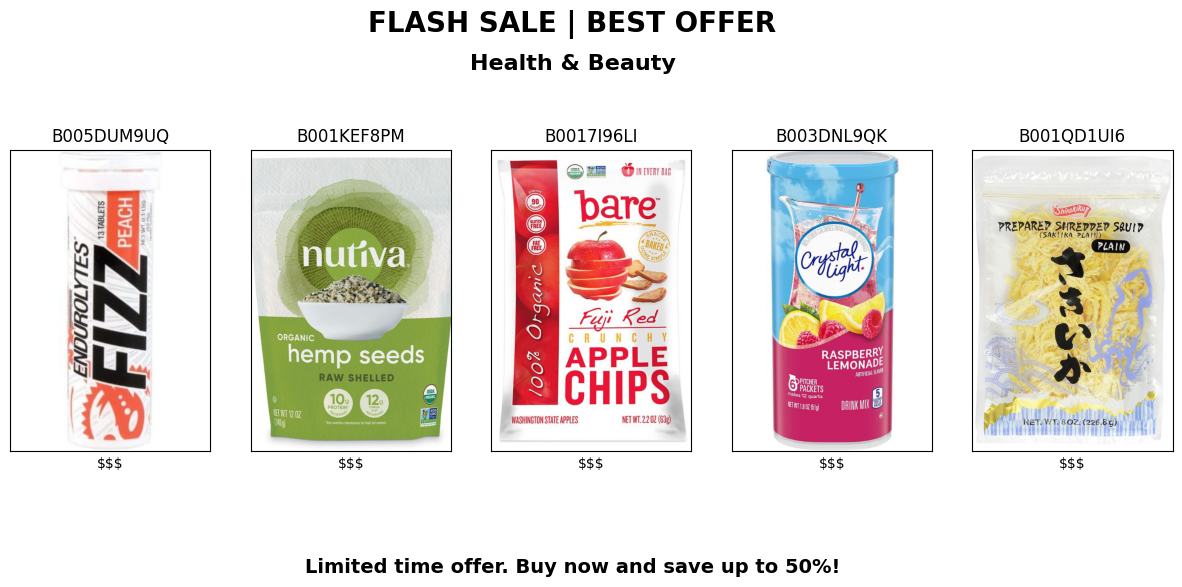

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define image file paths and titles
image_files = ['/content/drive/MyDrive/Bigdata/1.jpg',
               '/content/drive/MyDrive/Bigdata/2.jpg',
               '/content/drive/MyDrive/Bigdata/3.jpg',
               '/content/drive/MyDrive/Bigdata/4.jpg',
               '/content/drive/MyDrive/Bigdata/5.jpg']
titles = ['B005DUM9UQ', 'B001KEF8PM', 'B0017I96LI', 'B003DNL9QK', 'B001QD1UI6']


# Create figure and axes objects
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,6))

# Add title and text to figure
fig.suptitle('FLASH SALE | BEST OFFER', fontsize=20, fontweight='bold')
fig.text(0.5, 0.05, 'Limited time offer. Buy now and save up to 50%!',
         ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0.88, 'Health & Beauty', fontsize=16, fontweight='bold', ha='center')

# Load images and plot them on axes
for i, image_file in enumerate(image_files):
    img = Image.open(image_file)
    axs[i].imshow(img)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('$$$')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_ylabel('')

# Display plot
plt.show()
fig.savefig('/content/drive/MyDrive/Bigdata/flash_sale1.png')

FIND HIGHEST TOTAL PURCHASE IN BAD STORE AND PICK 5 PRODUCT AT THE HIGHEST PURCHASE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

bad_store['Total Purchase'] = bad_store['positive'] + bad_store['negative']
bad_store.head()

negative  positive  Total Purchase
ProductId                                     
B007I7Z3Z0       232       128             360
B0045XE32E       165       117             282
B007RTR9DS        94        92             186
B004Q3LBTG       103        87             190
B000FI4O90       103        87             190

WORD CLOUD SCORE = 1 && 2 OF EACH PRODUCT

ITERATE BAD PRODUCT

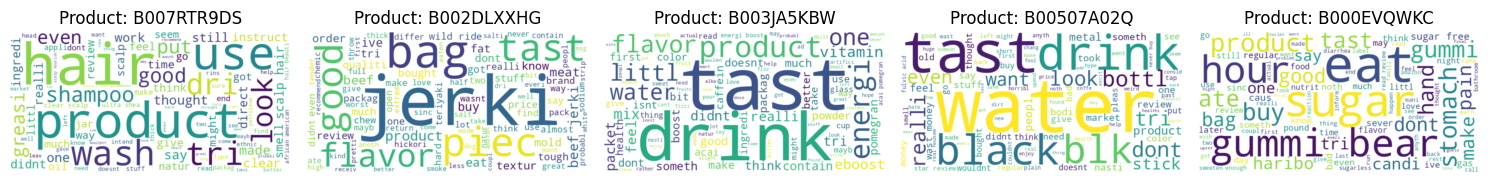

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# List of product IDs to generate word clouds for
product_ids = ["B007RTR9DS", "B002DLXXHG", "B003JA5KBW", "B00507A02Q", "B000EVQWKC"]

# Scores to filter the data on
scores = [1, 2]

# Define the subplot layout
num_rows = 1
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each product ID and generate word cloud
for i, product_id in enumerate(product_ids):
    # Filter the data based on product and score
    filtered_data = df2[(df2["ProductId"] == product_id) & (df2["Score"].isin(scores))]

    # Concatenate the filtered "CleanedText" column into a single string
    text = " ".join(filtered_data["CleanedText"].tolist())

    # Create a WordCloud object with desired settings
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Product: {product_id}")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


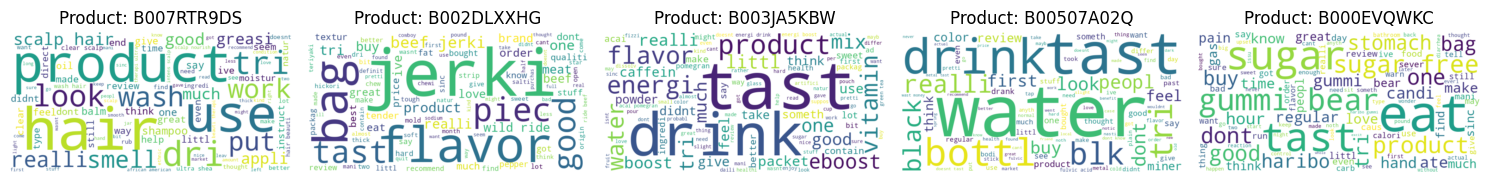

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# List of product IDs to generate word clouds for
product_ids = ["B007RTR9DS", "B002DLXXHG", "B003JA5KBW", "B00507A02Q", "B000EVQWKC"]

# Sentiments to filter the data on
sentiments = ["positive", "negative"]

# Define the subplot layout
num_rows = 1
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each product ID and generate word cloud
for i, product_id in enumerate(product_ids):
    # Filter the data based on product and sentiment
    filtered_data = df2[(df2["ProductId"] == product_id) & (df2["Sentiment"].isin(sentiments))]

    # Concatenate the filtered "CleanedText" column into a single string
    text = " ".join(filtered_data["CleanedText"].tolist())

    # Create a WordCloud object with desired settings
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Product: {product_id}")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
import re
df2['CleanedText'] = df2['CleanedText'].astype(str)

def connect_not_with_adjective(Text):
    """
    Takes a review string as input and returns a new review string
    with the word "not" connected to any adjective words.
    """
    pattern = re.compile(r'\bnot\s+(\w+)\b')
    return pattern.sub(r'\g<1> not', Text)
# Apply the connect_not_with_adjective function to the review column
df2['TextwithNot'] = df2['CleanedText'].apply(connect_not_with_adjective)


In [ ]:
import re
from IPython.display import display

df2['CleanedText'] = df2['CleanedText'].astype(str)

def connect_not_with_adjective(Text):
    """
    Takes a review string as input and returns a new review string
    with the word "not" connected to any adjective words.
    """
    pattern = re.compile(r'\bnot\s+(\w+)\b')
    return pattern.sub(r'\g<1> not', Text)

df2['TextwithNot'] = df2['CleanedText'].apply(connect_not_with_adjective)

display(df2[['CleanedText', 'TextwithNot']].head(10))


CleanedText  \
0  bought sever vital can dog food product found ...   
1  product arriv label jumbo salt peanut actual s...   
2  confect around pillowi citrus gelatin nut case...   
3  look secret ingredi robitussin believ found go...   
4  great taffi great wide assort yummi deliveri t...   
5  got wild hair taffi order five pound taffi enj...   
6  saltwat taffi great flavor soft candi individu...   
7  taffi soft flavor would definit recommend buy ...   
8  right most sprout cat eat love rotat around wh...   
9  healthi dog good also good small dog eat requi...   

                                         TextwithNot  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great wide assort yummi deliveri t...  
5  got wild hair taffi order five pound taffi enj...  
6  saltwat taffi great flavor soft candi individu...  
7  taffi soft flavor would definit recommend buy ...  
8  right most sprout cat eat love rotat around wh...  
9  healthi dog good also good small dog eat requi...

In [ ]:
import re
from IPython.display import display

df2['CleanedText'] = df2['CleanedText'].astype(str)

def connect_not_with_adjective(Text):
    """
    Takes a review string as input and returns a new review string
    with the word "not" connected to any adjective words.
    """
    pattern = re.compile(r'\bnot\s+([a-zA-Z]+)\b')
    return pattern.sub(r'\g<1> not', Text)

df2['TextwithNot'] = df2['CleanedText'].apply(connect_not_with_adjective)

display(df2[['CleanedText', 'TextwithNot']].head(10))


CleanedText  \
0  bought sever vital can dog food product found ...   
1  product arriv label jumbo salt peanut actual s...   
2  confect around pillowi citrus gelatin nut case...   
3  look secret ingredi robitussin believ found go...   
4  great taffi great wide assort yummi deliveri t...   
5  got wild hair taffi order five pound taffi enj...   
6  saltwat taffi great flavor soft candi individu...   
7  taffi soft flavor would definit recommend buy ...   
8  right most sprout cat eat love rotat around wh...   
9  healthi dog good also good small dog eat requi...   

                                         TextwithNot  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great wide assort yummi deliveri t...  
5  got wild hair taffi order five pound taffi enj...  
6  saltwat taffi great flavor soft candi individu...  
7  taffi soft flavor would definit recommend buy ...  
8  right most sprout cat eat love rotat around wh...  
9  healthi dog good also good small dog eat requi...

In [ ]:
import re

# Load the dataset
df_most = df2[df2['ProductId'] == "B002QWP89S"]

for row in df_most['CleanedText']:
    # Search using regex
    x = re.search('^not', row)

    if x:
        print('The line starts with \'not\'.')



The line starts with 'not'.
The line starts with 'not'.
The line starts with 'not'.


In [ ]:
import re
import pandas as pd



# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'CleanedText' column
for idx, row in df['Text'].iteritems():
    # Search using regex
    x = re.search(r'\b(no |not )\s', row)

    if x:
        # If the row matches the regex, add it to the list along with its index
        matched_rows.append({'Index': idx, 'Text': row})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched_df)


<ipython-input-22-85ba3673f260>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


      Index                                               Text
0      4077  Put simply this is a brilliant piece of kit......
1      4803  My new Yorkie came from a puppy mill. She was ...
2      9455  licorice  has  no  flavor very hard  to eat it...
3     10392  I was very disapointed with these flowers. Sev...
4     12752  Its  hard to find this Gyro Meat loaf. Once I ...
..      ...                                                ...
165  548496  I have not  yet put the sugar sheet on my cake...
166  552941  I could not find the large containers of McCor...
167  555431  Have been using Nu-Salt since the 80's. You ca...
168  562022  If u people want these that are not  stale and...
169  566871  I've tried every kind of canned tuna, and this...

[170 rows x 2 columns]


In [ ]:
import re
import pandas as pd

# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'Text' column
for idx, row in df['Text'].iteritems():
    # Search using regex to find "no" or "not" followed by a word
    x = re.search(r'\b(no  |not  )(\S+)', row)

    if x:
        # Get the next word after "no" or "not"
        next_word = x.group(2)
        # If the row matches the regex, add it to the list along with its index and the next word
        matched_rows.append({'Index': idx, 'Text': row, 'NextWord': next_word})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched_df)


<ipython-input-32-091a4ded174b>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


      Index                                               Text   NextWord
0      4077  Put simply this is a brilliant piece of kit......          -
1      4803  My new Yorkie came from a puppy mill. She was ...  parasites
2      9455  licorice  has  no  flavor very hard  to eat it...     flavor
3     10392  I was very disapointed with these flowers. Sev...       open
4     12752  Its  hard to find this Gyro Meat loaf. Once I ...         to
..      ...                                                ...        ...
165  548496  I have not  yet put the sugar sheet on my cake...        yet
166  552941  I could not find the large containers of McCor...      luck.
167  555431  Have been using Nu-Salt since the 80's. You ca...       tell
168  562022  If u people want these that are not  stale and...      stale
169  566871  I've tried every kind of canned tuna, and this...       only

[170 rows x 3 columns]


In [ ]:
import re
import pandas as pd

# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'Text' column
for idx, row in df['Text'].iteritems():
    # Search using regex to find "no" or "not" followed by a word
    x = re.search(r'\b(no|not)\s+(\S+)', row)

    if x:
        # Get the matched word including "no" or "not" and the next word
        matched_word = x.group()
        # If the row matches the regex, add it to the list along with its index and the matched word
        matched_rows.append({'Index': idx, 'Text': row, 'MatchedWord': matched_word})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched_df)


<ipython-input-5-e418cba62ccd>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


         Index                                               Text  \
0            5  I got a wild hair for taffy and ordered this f...   
1           11  One of my boys needed to lose some weight and ...   
2           12  My cats have been happily eating Felidae Plati...   
3           16  I love eating them and they are good for watch...   
4           18  Twizzlers, Strawberry my childhood favorite ca...   
...        ...                                                ...   
231747  568442  This product is great.  Gives you so much ener...   
231748  568447  Hoping there is no MSG in this, this tastes ex...   
231749  568449  Great for sesame chicken..this is a good if no...   
231750  568450  I'm disappointed with the flavor. The chocolat...   
231751  568451  These stars are small, so you can give 10-15 o...   

            MatchedWord  
0                not my  
1         no by-product  
2             not touch  
3               not too  
4       not recommended  
...            

<ipython-input-6-049940c1684f>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


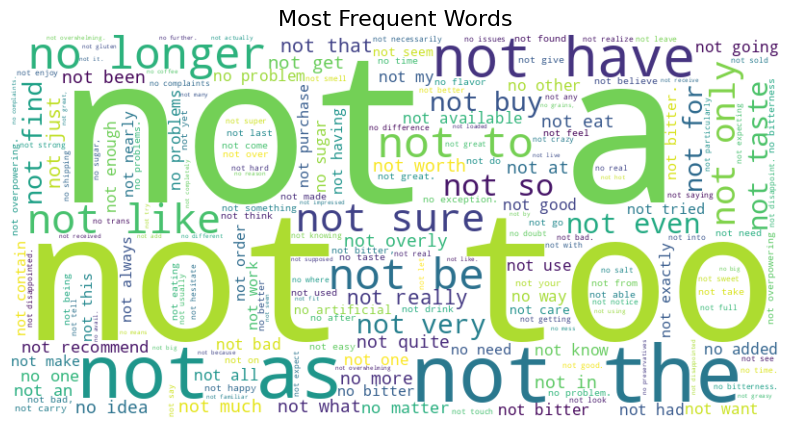

In [ ]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'Text' column
for idx, row in df['Text'].iteritems():
    # Search using regex to find "no" or "not" followed by a word
    x = re.search(r'\b(no|not)\s+(\S+)', row)

    if x:
        # Get the matched word including "no" or "not" and the next word
        matched_word = x.group()
        # If the row matches the regex, add it to the list along with its index and the matched word
        matched_rows.append({'Index': idx, 'Text': row, 'MatchedWord': matched_word})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Generate word frequencies from the 'MatchedWord' column
word_freq = matched_df['MatchedWord'].value_counts()

# Create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=16)
plt.show()


In [ ]:
import re
import pandas as pd
import nltk
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'Text' column
for idx, row in df['Text'].iteritems():
    # Tokenize the row text
    tokens = nltk.word_tokenize(row)
    # Perform POS tagging on the tokens
    tagged_tokens = pos_tag(tokens)

    # Search for "no" or "not" followed by an adjective (tagged as 'JJ')
    for i in range(len(tagged_tokens) - 1):
        if (tagged_tokens[i][0] == 'no' or tagged_tokens[i][0] == 'not') and tagged_tokens[i+1][1] == 'JJ':
            # Get the matched word including "no" or "not" and the adjective
            matched_word = tagged_tokens[i][0] + ' ' + tagged_tokens[i+1][0]
            # If the row matches the criteria, add it to the list along with its index and the matched word
            matched_rows.append({'Index': idx, 'Text': row, 'MatchedWord': matched_word})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
<ipython-input-9-0210f8a915ec>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


KeyboardInterrupt: ignored

<ipython-input-10-56836ab02336>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in filtered_df.iteritems():


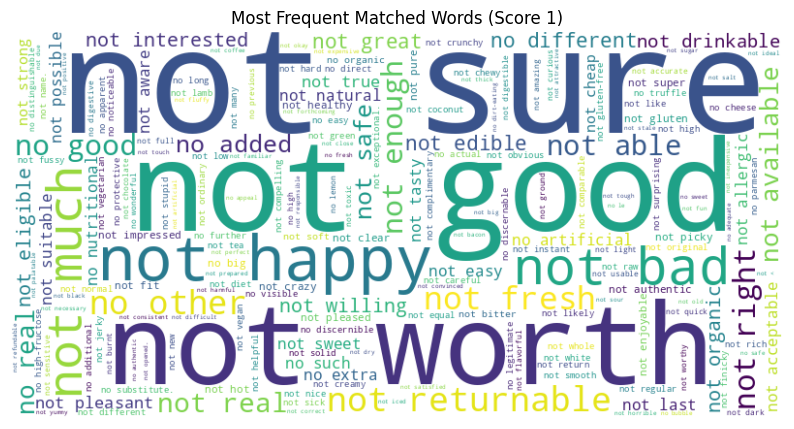

In [ ]:
#FIX for score 1
import re
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Filter the data for score 1 in the Text column
filtered_df = df[df['Score'] == 1]['Text']

# Initialize an empty list to store the matching words
matched_words = []

# Iterate over each row in the filtered dataframe
for idx, row in filtered_df.iteritems():
    # Tokenize the row text
    tokens = nltk.word_tokenize(row)
    # Perform POS tagging on the tokens
    tagged_tokens = pos_tag(tokens)

    # Search for "no" or "not" followed by an adjective (tagged as 'JJ')
    for i in range(len(tagged_tokens) - 1):
        if (tagged_tokens[i][0] == 'no' or tagged_tokens[i][0] == 'not') and tagged_tokens[i+1][1] == 'JJ':
            # Get the matched word including "no" or "not" and the adjective
            matched_word = tagged_tokens[i][0] + ' ' + tagged_tokens[i+1][0]
            # Add the matched word to the list
            matched_words.append(matched_word)

# Create a frequency distribution of the matched words
freq_dist = nltk.FreqDist(matched_words)

# Generate a word cloud from the frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Matched Words (Score 1)')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-11-ab3ed8cd3ad8>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in filtered_df.iteritems():


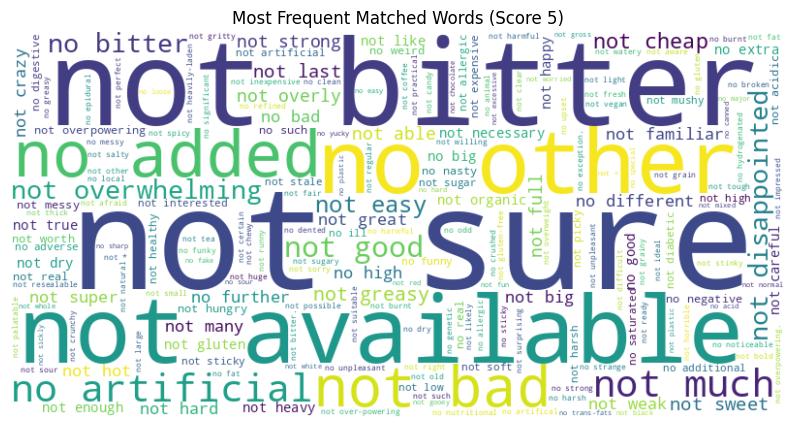

In [ ]:
#FIX for score 5
import re
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Filter the data for score 5 in the Text column
filtered_df = df[df['Score'] == 5]['Text']

# Initialize an empty list to store the matching words
matched_words = []

# Iterate over each row in the filtered dataframe
for idx, row in filtered_df.iteritems():
    # Tokenize the row text
    tokens = nltk.word_tokenize(row)
    # Perform POS tagging on the tokens
    tagged_tokens = pos_tag(tokens)

    # Search for "no" or "not" followed by an adjective (tagged as 'JJ')
    for i in range(len(tagged_tokens) - 1):
        if (tagged_tokens[i][0] == 'no' or tagged_tokens[i][0] == 'not') and tagged_tokens[i+1][1] == 'JJ':
            # Get the matched word including "no" or "not" and the adjective
            matched_word = tagged_tokens[i][0] + ' ' + tagged_tokens[i+1][0]
            # Add the matched word to the list
            matched_words.append(matched_word)

# Create a frequency distribution of the matched words
freq_dist = nltk.FreqDist(matched_words)

# Generate a word cloud from the frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Matched Words (Score 5)')
plt.show()


In [ ]:
import re
import pandas as pd

# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'CleanedText' column
for idx, row in df['Text'].iteritems():
    # Search using regex
    x = re.search(r'\b(no |not )(\S+)', row)

    if x:
        # If the row matches the regex, extract the next word after "no" or "not"
        next_word = x.group(2)
        # Add the matching row to the list along with the extracted next word and its index
        matched_rows.append({'Index': idx, 'Text': row, 'Next Word': next_word})

# Create a new DataFrame from the list of matching rows
matched23_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched23_df)


<ipython-input-38-596e8fe82a9c>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df['Text'].iteritems():


         Index                                               Text    Next Word
0            5  I got a wild hair for taffy and ordered this f...           my
1           11  One of my boys needed to lose some weight and ...   by-product
2           12  My cats have been happily eating Felidae Plati...        touch
3           16  I love eating them and they are good for watch...          too
4           18  Twizzlers, Strawberry my childhood favorite ca...  recommended
...        ...                                                ...          ...
231664  568442  This product is great.  Gives you so much ener...           be
231665  568447  Hoping there is no MSG in this, this tastes ex...          MSG
231666  568449  Great for sesame chicken..this is a good if no...       better
231667  568450  I'm disappointed with the flavor. The chocolat...         time
231668  568451  These stars are small, so you can give 10-15 o...         make

[231669 rows x 3 columns]


In [ ]:
# Save the new DataFrame as a CSV file
matched_df.to_csv('matched_rows.csv', index=False)

In [ ]:
# Save the new DataFrame as a CSV file
matched23_df.to_csv('matched23_rows.csv', index=False)

In [ ]:
import re
import pandas as pd

# Load the dataset
df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Initialize an empty list to store the matching rows
matched_rows = []

# Iterate over each row in the 'CleanedText' column
for idx, row in df_most['CleanedText'].iteritems():
    # Search using regex
    x = re.search(r'\b(no|not)\s', row)

    if x:
        # If the row matches the regex, add it to the list along with its index
        matched_rows.append({'Index': idx, 'CleanedText': row})

# Create a new DataFrame from the list of matching rows
matched_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
print(matched_df)


Empty DataFrame
Columns: []
Index: []


<ipython-input-15-e885d72822bc>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in df_most['CleanedText'].iteritems():


WORDCLOUD -- ASPECT ANALYSIS

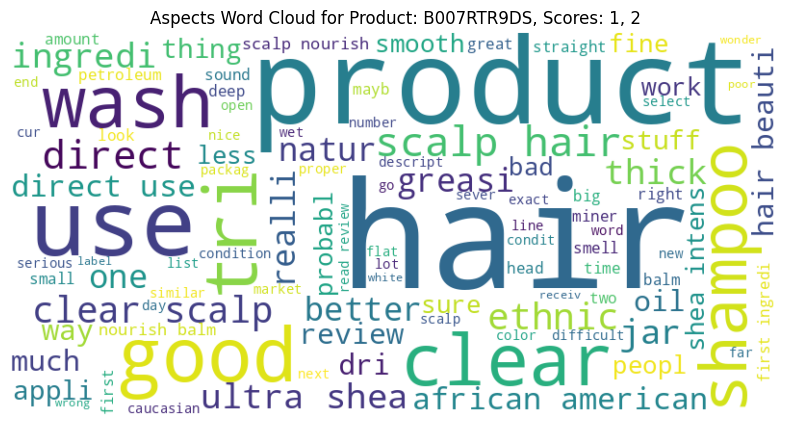

In [ ]:
#Product 1 Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B007RTR9DS"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


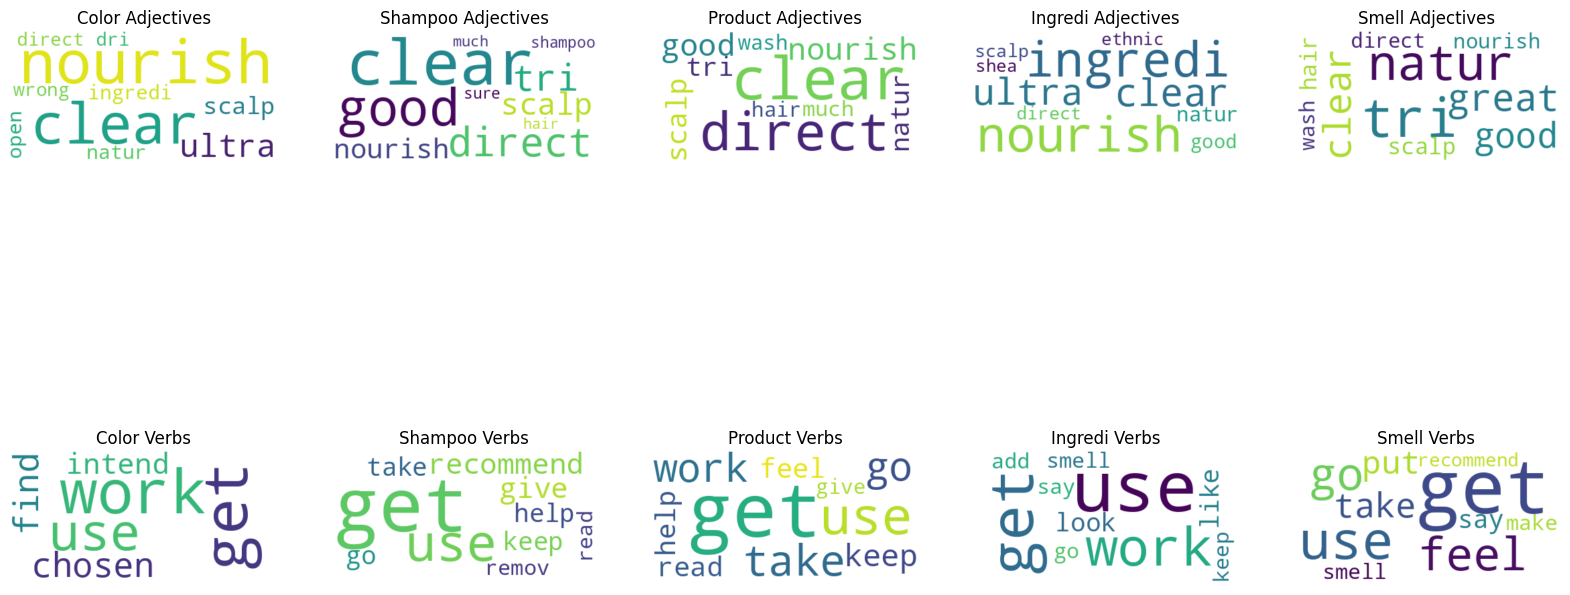

In [ ]:
#Product 1 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['color', 'shampoo', 'product', 'ingredi', 'smell']

# Filter the data based on product and score
product = "B007RTR9DS"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


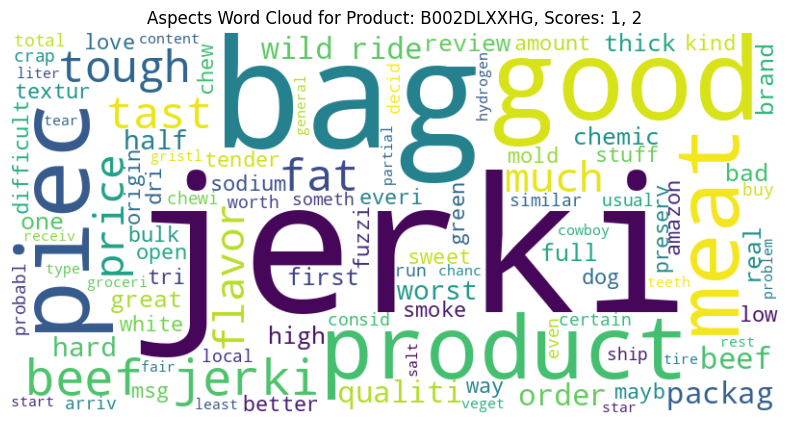

In [ ]:
#Product 2 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B002DLXXHG"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


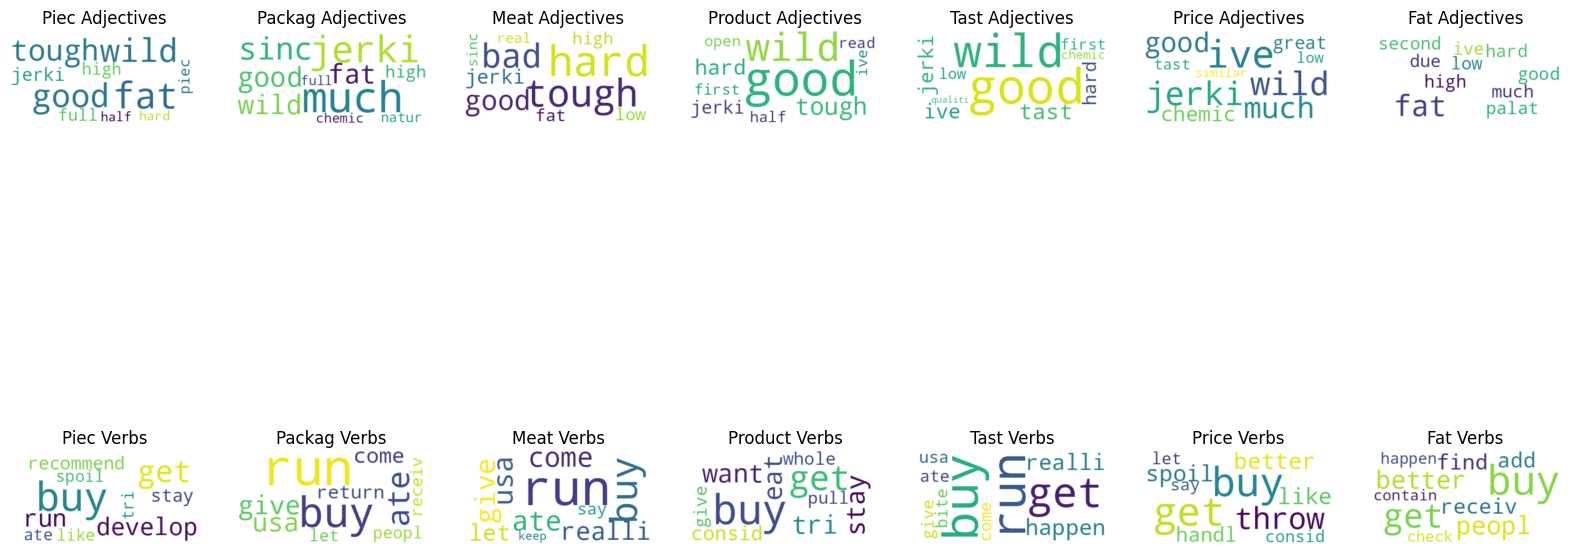

In [ ]:
#Product 2 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['piec', 'packag', 'meat', 'product','tast', 'price', 'fat']

# Filter the data based on product and score
product = "B002DLXXHG"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


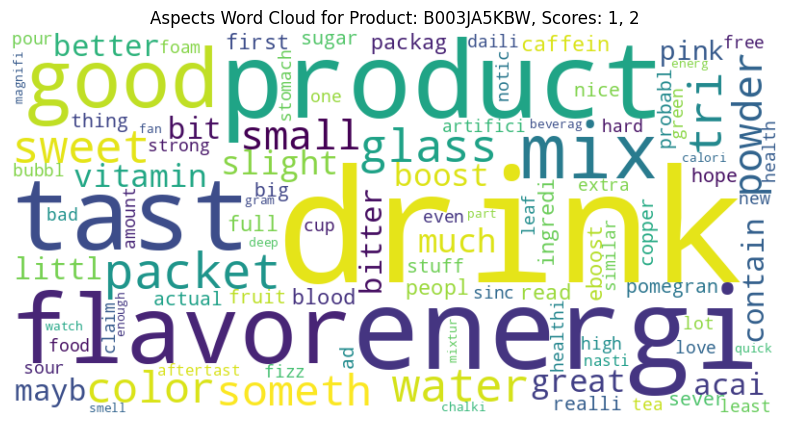

In [ ]:
#Product 3 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B003JA5KBW"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


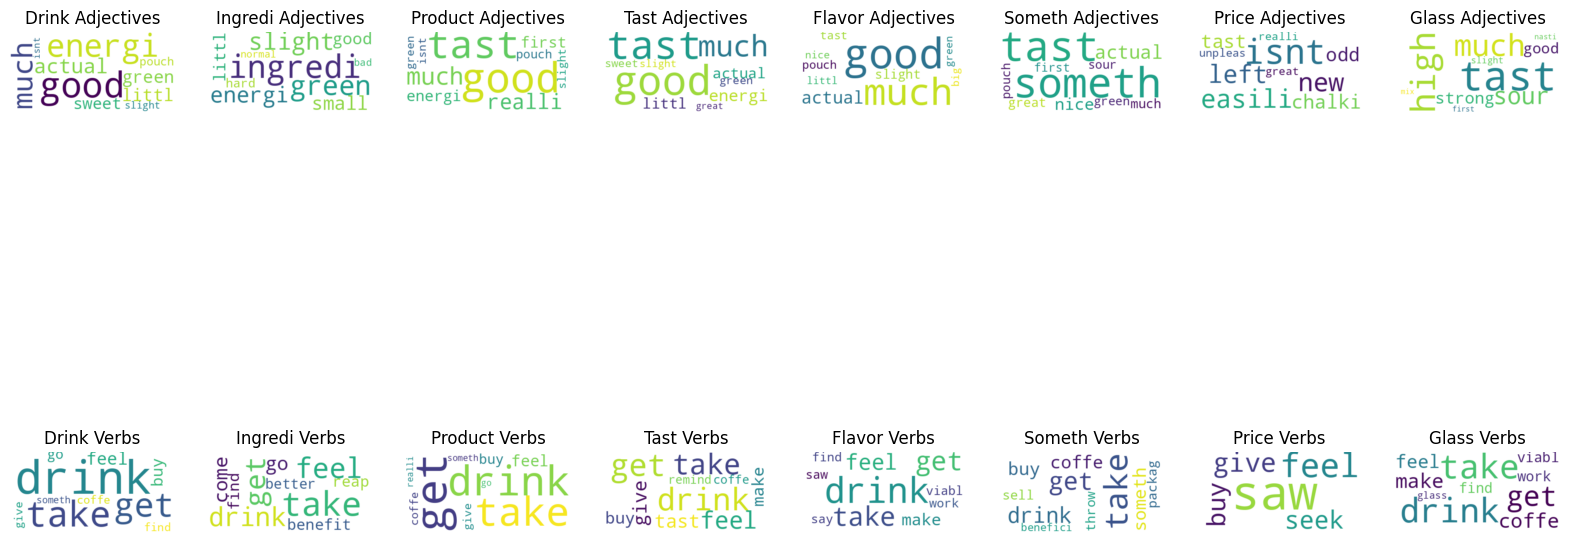

In [ ]:
#Product 3 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['drink', 'ingredi', 'product','tast','flavor', 'someth', 'price', 'glass']

# Filter the data based on product and score
product = "B003JA5KBW"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


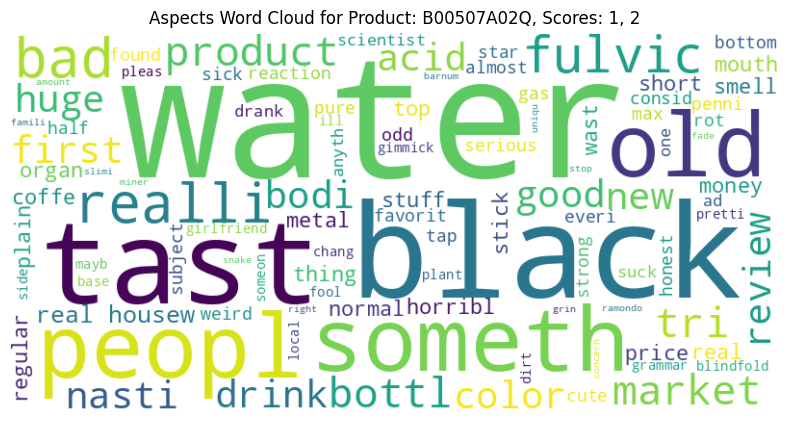

In [ ]:
#Product 4 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B00507A02Q"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


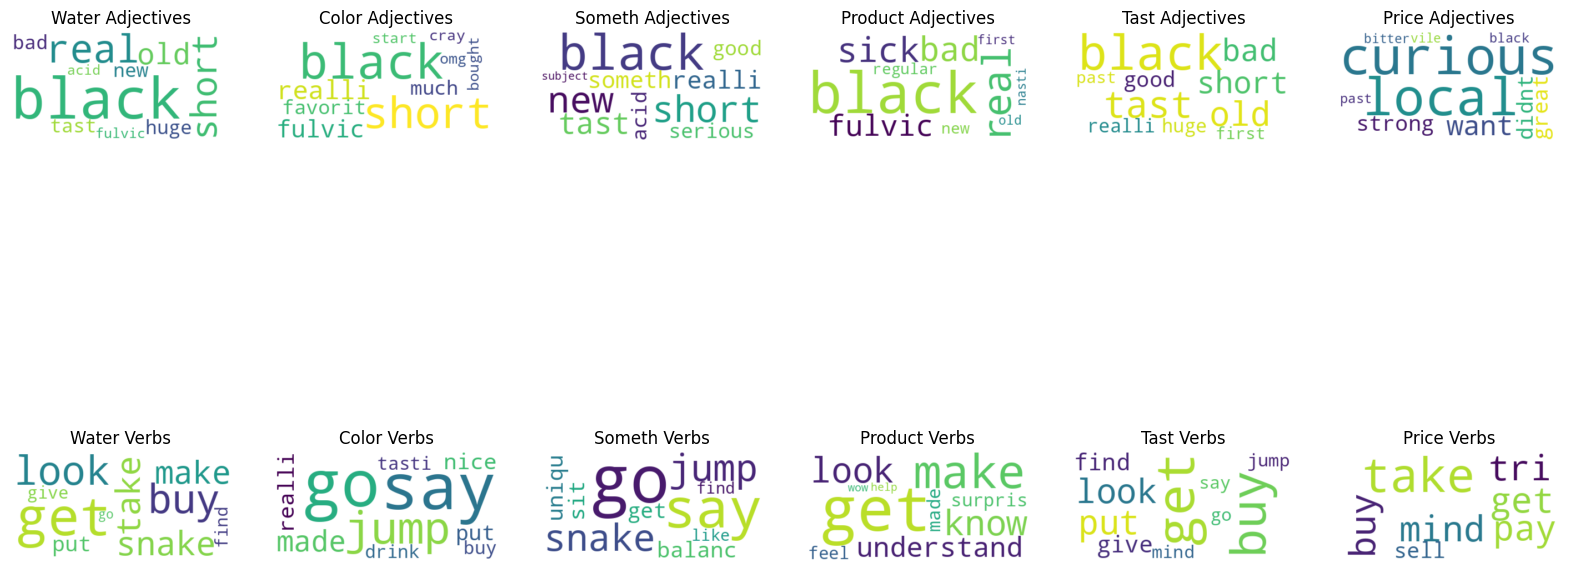

In [ ]:
#Product 4 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['water', 'color', 'someth', 'product','tast', 'price']

# Filter the data based on product and score
product = "B00507A02Q"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


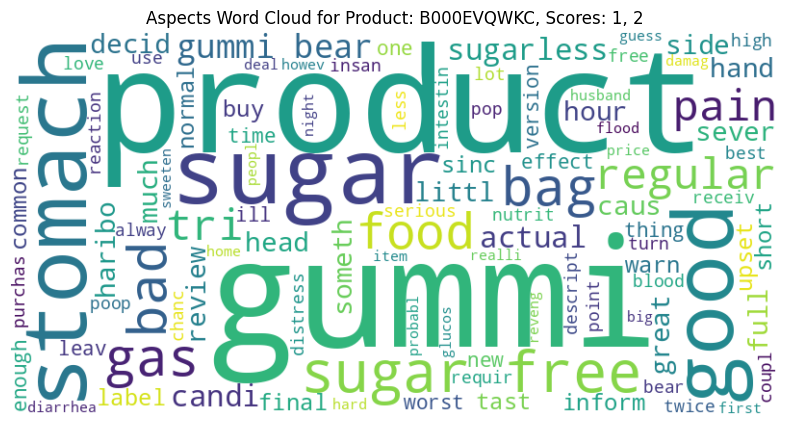

In [ ]:
#Product 5 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B000EVQWKC"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


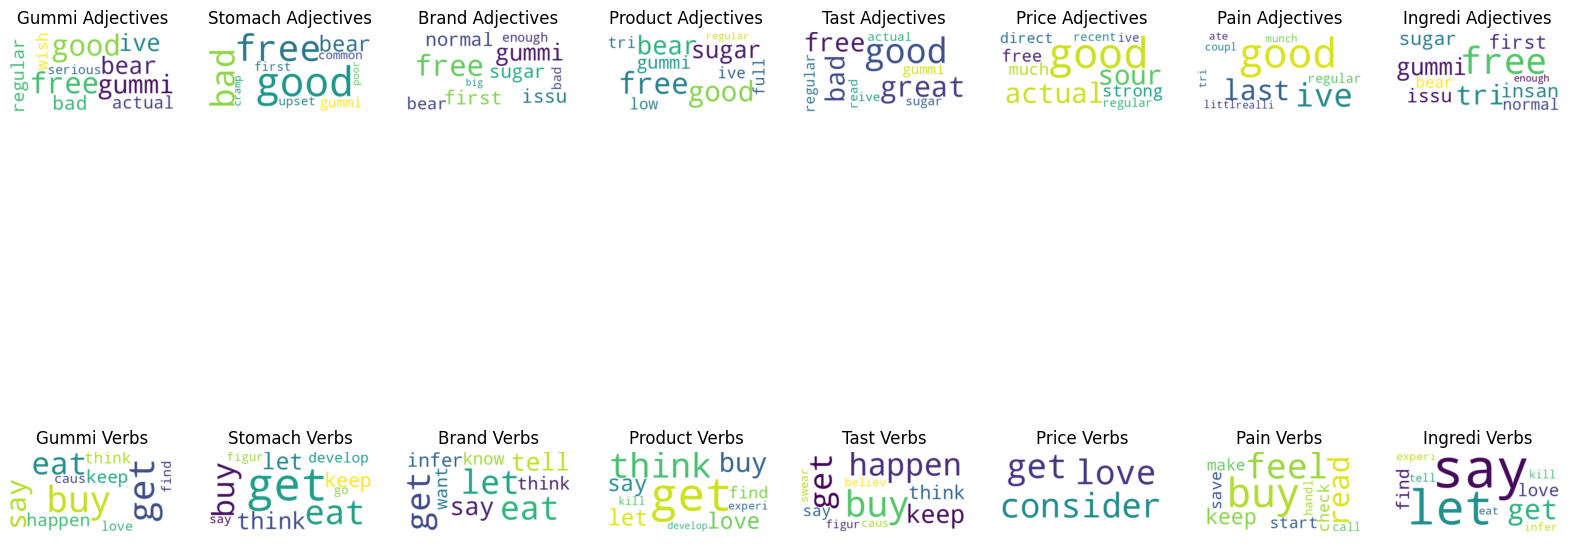

In [ ]:
#Product 5 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['gummi', 'stomach', 'brand', 'product','tast','price', 'pain', 'ingredi']

# Filter the data based on product and score
product = "B000EVQWKC"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()
